In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics

from sklearn.decomposition import TruncatedSVD

# Zad. 
Wczytaj dane zawierające informacje o piosenkach.

Dane trzeba rozpakować.

https://www.kaggle.com/laowingkin/song-text-mining-and-clustering/data

# Zad

Znajdź najlepszy model dla 20newsgroups wykonując GridSearch dla modeli:

* MultinomialNB (bez redukcji wymiarowości)
* LogisticRegression
* LinearSVC
* SVC
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier
* BaggingClassifier
* ExtraTreesClassifier
* AdaBoostClassifier
* GradientBoostingClassifier
* VotingClassifier
* xgboost.XGBClassifier

In [ ]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [3]:
import numpy as np
import os 


to_remove= ('headers', 'footers', 'quotes')

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='all', shuffle=True, remove = to_remove)

In [4]:
df = pd.read_csv('songdata.csv')
df['text'] = df['text'].str.replace('\n', '')
df.head(10)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face And i..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please Touch me gently ..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go Why I had to ...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong You're encha..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun Couldn't sleep...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby I'm sitting all alon...


In [14]:
# y = df["artist"].values[:1000]
X = df["text"].values[:1000]

In [15]:
d = dict(zip(np.unique(y), range(0, len( np.unique(y) ))))
d

df["artist"].map(d, na_action='ignore').values[:1000]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4

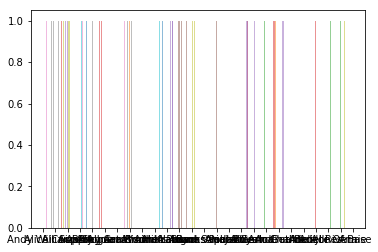

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

In [17]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB

    
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB()),
])

param_grid = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)]
}

grid_0 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_0.fit(X_train, y_train)
grid_0.best_params_


C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'vectorizer': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.5, max_features=None, min_df=10,
         ngram_range=(1, 1), preprocessor=None, stop_words='english',
         strip_accents='unicode', token_pattern='\\b[a-zA-Z]{3,}\\b',
         tokenizer=None, vocabulary=None)}

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

pipe = Pipeline([
    ('vectorizer', CountVectorizer()), 
    ("pca", TruncatedSVD(n_components=2)), 
    ('classifier', LinearSVC(C=1))
])

param_grid = {
            'vectorizer': [TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10), 
                           CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)],
            'classifier__C': [0.01, 0.1, 1, 10]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'classifier__C': 10,
 'vectorizer': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.5, max_features=None, min_df=10,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words='english', strip_accents='unicode', sublinear_tf=False,
         token_pattern='\\b[a-zA-Z]{3,}\\b', tokenizer=None, use_idf=True,
         vocabulary=None)}

In [22]:
from sklearn import  metrics


models = []
models.append(('NB', grid_0.best_estimator_))
models.append(('SVM linear', grid_1.best_estimator_))
# models.append(('SVM rbf', grid_2.best_estimator_))
# models.append(('LR', grid_3.best_estimator_))
# models.append(('KNN', grid_4.best_estimator_))
# models.append(('DecisionTreeClassifier', grid_5.best_estimator_))
# models.append(('BaggingClassifier', grid_6.best_estimator_))
# models.append(('RandomForestClassifier', grid_7.best_estimator_))
# models.append(('ExtraTreesClassifier', grid_8.best_estimator_))
# models.append(('AdaBoostClassifier', grid_9.best_estimator_))
# models.append(('GradientBoostingClassifier', grid_10.best_estimator_))
# models.append(('XGBClassifier', grid_11.best_estimator_))
# models.append(('voting_clf', voting_clf))
# models.append(('XGBClassifier r2', grid_12.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    

    precision_score.append(metrics.precision_score(y_test , model.predict(X_test), average='weighted') )
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test), average='weighted') )
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test), average='weighted') )
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))


NB
precision_score: 0.26208848371281307
recall_score: 0.276
f1_score: 0.2604350920554498
accuracy_score: 0.276


C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average,

SVM linear
precision_score: 0.062400000000000004
recall_score: 0.172
f1_score: 0.08615156572657068
accuracy_score: 0.172


C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['NB', 'SVM linear'])
# df.insert(loc=0, column='Method', value=['NB', 'SVM linear','SVM rbf','LR','KNN','DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier','ExtraTreesClassifier', 'AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','voting','XGBClassifier r'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,NB,0.262088,0.276,0.260435,0.276
1,SVM linear,0.062400,0.172,0.086152,0.172
